Group Members- Rashik Iram Chowdhury (2111336642), Zarin Akter (2011704042) and Md. Mutasim Farhan (2013123642)

# Loading the dataset and adjusting it to our criterion

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("G:\\Assignment\\AirQualityUCI.csv")
data = np.array(df)


**As we want to work with numerical data to apply linear regression and are not allowed to convert categorical data to numeric with any encoder we are dropping Date and Time features**

In [2]:
import math
final_dataset = data[:,2:15]
#Replacing Missing Values by mean
total_sum = [0] * len(final_dataset[0])
instances = [0] * len(final_dataset[0])

for i in range(len(total_sum)):
    total_sum[i] = 0
    instances[i] = 0

for columns in range(len(final_dataset[0])):
    for rows in range(len(final_dataset)):
        x = final_dataset[rows][columns]
        if x != -200:
            total_sum[columns] += x
            instances[columns] += 1

means = [round(total_sum / instances,1) if instances != 0 else 0 for total_sum, instances in zip(total_sum, instances)]

for columns in range(len(final_dataset[0])):
    for rows in range(len(final_dataset)):
        if final_dataset[rows][columns] == -200:
            final_dataset[rows][columns] = means[columns]
            
df = pd.DataFrame(final_dataset)
#df.to_csv (r'G:\\Assignment\\Assignment1_Updated_Dataset.csv', index = None, header=True) 

In [3]:
import math

final_dataset = data[:,2:15]
final_dataset[:,12] #our target column for now
total_instances = len(final_dataset)
print("Total Instances: ", total_instances) #9357
#We could have tried shuffling for better experiment
Train_size = math.floor(0.75*total_instances)#7017
print("Train dataset size: ", Train_size)

Train_ds = final_dataset[:Train_size]
Test_ds = final_dataset[Train_size:]

print("Shape of Train_ds:", Train_ds.shape)
print("Shape of Test_ds:", Test_ds.shape)


Total Instances:  9357
Train dataset size:  7017
Shape of Train_ds: (7017, 13)
Shape of Test_ds: (2340, 13)


# Feature Engineering

In [4]:
print("Number of instances:", len(Train_ds))
print("Number of columns:", len(Train_ds[0]))

Number of instances: 7017
Number of columns: 13


In [5]:
Train_ds.shape

(7017, 13)

In [6]:
Train_ds[:, :10] 

array([[2.6, 1360, 150, ..., 113, 1692, 1268],
       [2.0, 1292, 112, ..., 92, 1559, 972],
       [2.2, 1402, 88, ..., 114, 1555, 1074],
       ...,
       [1.2, 987, 218.8, ..., 101, 1145, 797],
       [2.2, 969, 218.8, ..., 113.1, 1082, 691],
       [2.2, 939, 218.8, ..., 113.1, 1084, 680]], dtype=object)

In [7]:
print("Number of columns including target:", (len(Train_ds[0])))
print("Number of columns without targets:", (len(Train_ds[0])-3))

Number of columns including target: 13
Number of columns without targets: 10


In [8]:
def feature_scaling(dataset):
    total_sum = [0] * len(dataset[0])
    instances = [0] * len(dataset[0])

    for columns in range(len(dataset[0])): 
        for rows in range(len(dataset)):
            x = dataset[rows][columns]
            if x != -200:
                total_sum[columns] += x
                instances[columns] += 1

    means = [total_sum[i] / instances[i] if instances[i] != 0 else 0 for i in range(len(total_sum))]

    sum_squared_diff = [0] * len(dataset[0])

    for columns in range(len(dataset[0])):
        for rows in range(len(dataset)):
            x = dataset[rows][columns]
            diff = x - means[columns]
            sum_squared_diff[columns] += diff ** 2

    std_deviations = [((sum_squared_diff[i] / (instances[i] - 1)) ** 0.5) if instances[i] > 1 else 0 for i in range(len(sum_squared_diff))]

    for columns in range(len(dataset[0])):
        for rows in range(len(dataset)):
            value = dataset[rows][columns]
            normalized_value = (value - means[columns]) / std_deviations[columns] if std_deviations[columns] != 0 else 0
            dataset[rows][columns] = normalized_value
    
    return dataset, means, std_deviations


Considering target AH

In [9]:
Train_ds, means, std_deviations = feature_scaling(Train_ds)

X_train = Train_ds[:, :10] 
y_train = Train_ds[:, 12]

#Performing Mean Normalization using means and std_deviations of Train_ds on Test_ds

for columns in range(len(Test_ds[0])):
        for rows in range(len(Test_ds)):
            value = Test_ds[rows][columns]
            normalized_value = (value - means[columns]) / std_deviations[columns] if std_deviations[columns] != 0 else 0
            Test_ds[rows][columns] = normalized_value


X_test = Test_ds[:, :10] 
y_test = Test_ds[:, 12]




In [10]:
X_train[:,0]

array([0.3092415332535181, -0.14616743638658922, 0.00563555349344667, ...,
       -0.7533793959067322, 0.00563555349344667, 0.00563555349344667],
      dtype=object)

In [11]:
y_test

array([-0.848025970408613, -0.8331430262359368, -0.937048025367399, ...,
       -1.3818826900840573, -1.7310806579874063, -1.7616733765645742],
      dtype=object)

In [12]:
y_train 

array([-1.058867679521527, -1.1478897344803132, -1.079814045394183, ...,
       -0.6666745395637798, -0.7769185704724931, -0.8535381719540487],
      dtype=object)

In [13]:
X_train.shape[1]

10

# Calculating Mean Squared Error and applying Gradient Descent Algorithm 

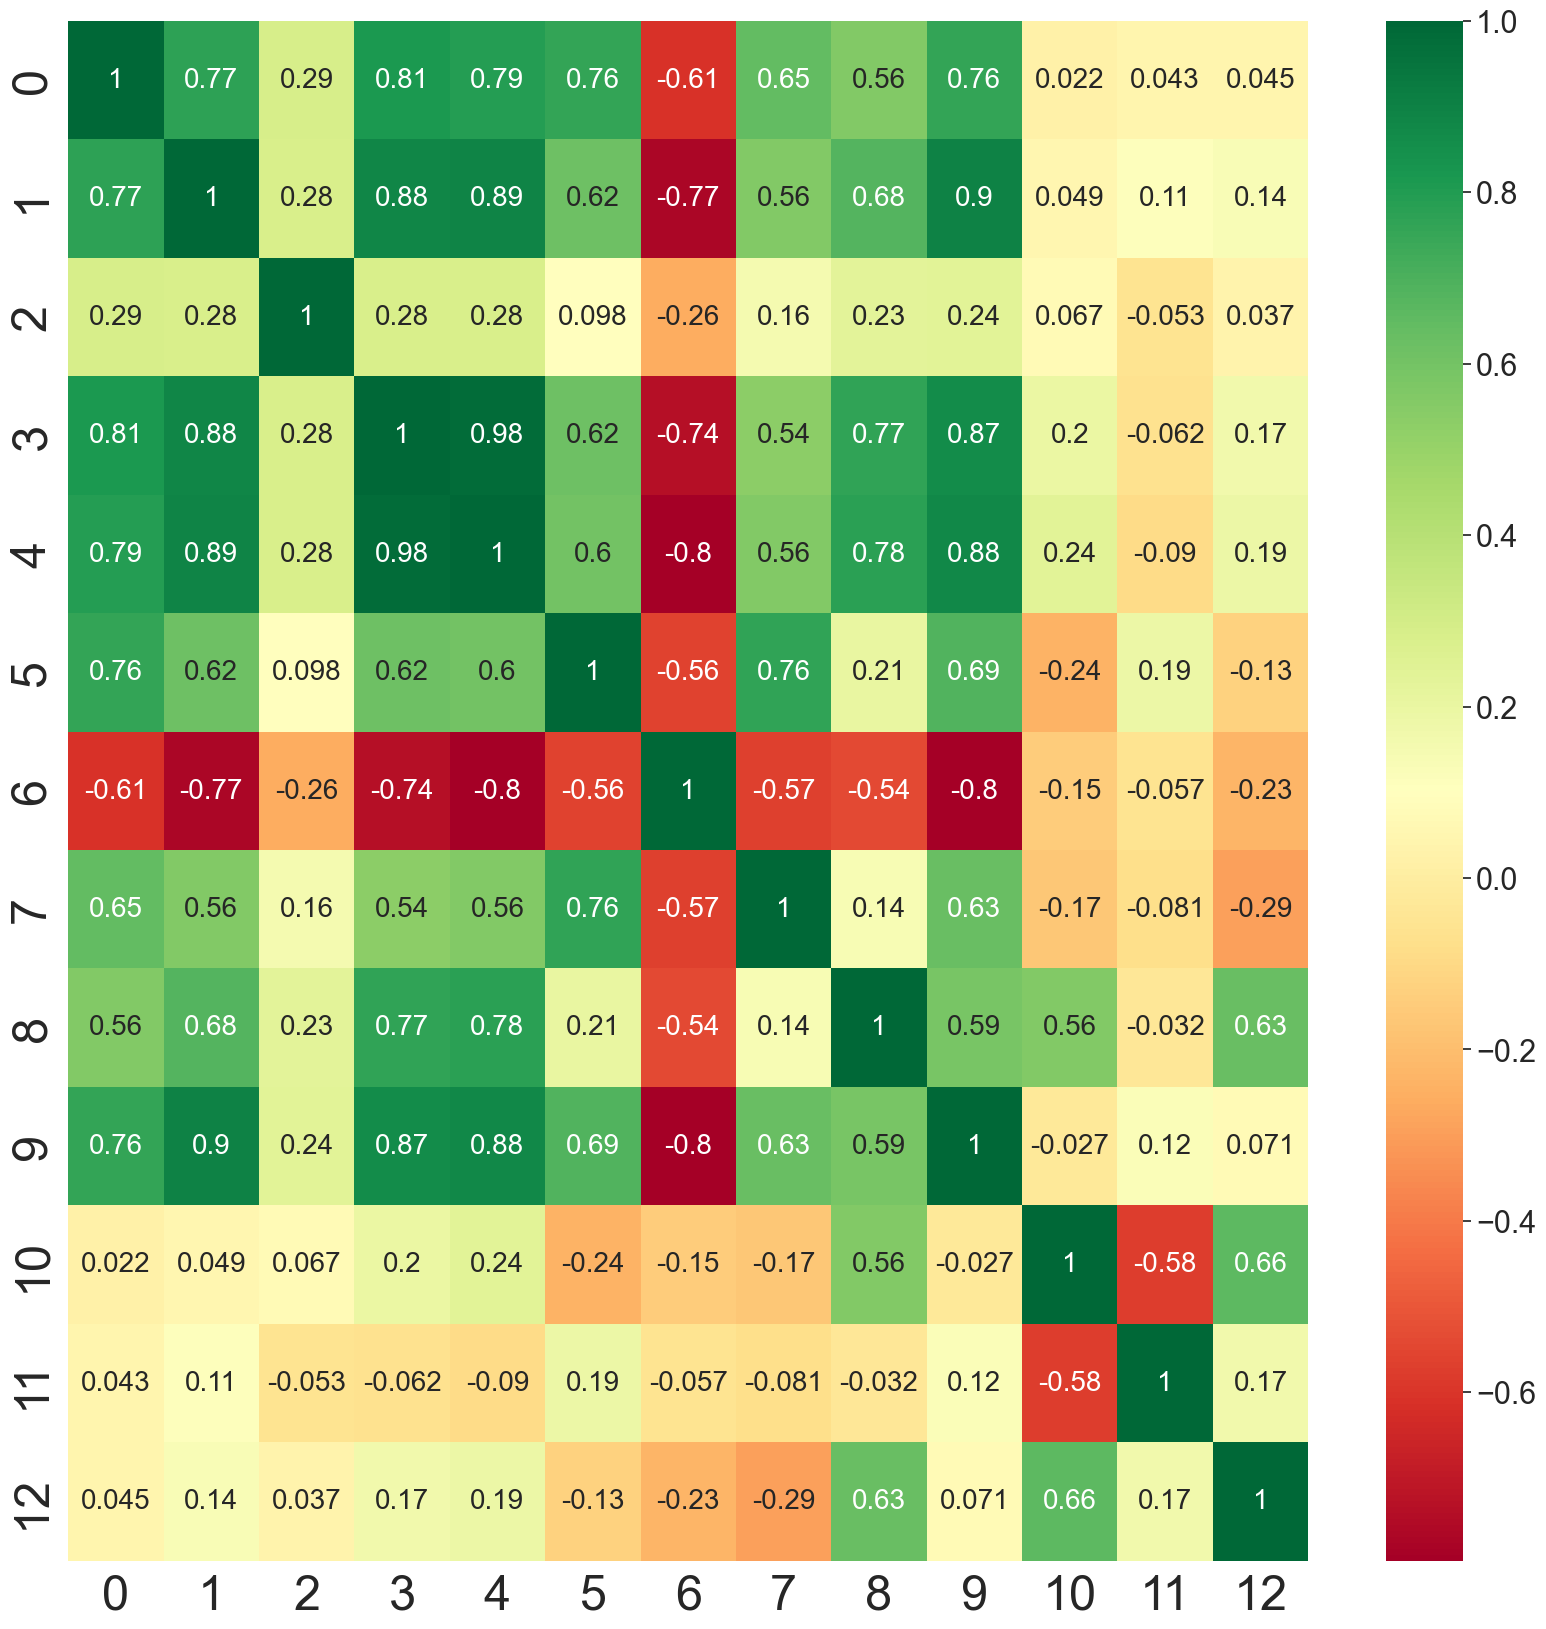

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={'size': 20})   #heatmap
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

plt.show()

In [15]:
def cost_function_with_regularization(X, y, w, b, lamb_da):
   
    m = X.shape[0]  #This is the number of instances in the dataset
    n = X.shape[1]
    cost = 0
    regularizer = 0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b # This is the hypothesis function
        cost = cost + (f_wb - y[i])**2
    
    for j in range(n):
        regularizer = regularizer + w[j] ** 2
    
    total_regularization = regularizer * lamb_da / (2 * m)
    total_cost = 1 / (2 * m) * cost
    
    regularized_cost = total_cost + total_regularization
    return regularized_cost

Based on the heatmap earlier we can see target is highly correlated with feature 9 so we are going to consider higher weights based on presumptions of the heat map

In [16]:
lamb_da = 1
w = np.array([0.5,0.1,3.0,4.0,3.0,1.0,1.2,1.0,10.0,8.2])
b = 0 #Considering bias term 0

print("Trial 1 Mean Squared Error: ", cost_function_with_regularization(X_train, y_train, w, b,lamb_da))

lamb_da = 0
print("Trial 2 Mean Squared Error: ", cost_function_with_regularization(X_train, y_train, w, b, lamb_da))
lamb_da = 10000
b = 1
print("Trial 3 Mean Squared Error: ", cost_function_with_regularization(X_train, y_train, w, b, lamb_da))
lamb_da = 100
print("Trial 4 Mean Squared Error: ", cost_function_with_regularization(X_train, y_train, w, b, lamb_da))
b = 0
lamb_da = 1
print("Trial 5 Mean Squared Error: ", cost_function_with_regularization(X_train, y_train, w, b, lamb_da))

w = np.array([0,0,0,0,0,0,0,0,0.0,0])
b = 2
lamb_da = 100
print("Trial 6 Mean Squared Error: ", cost_function_with_regularization(X_train, y_train, w, b, lamb_da))
b = 0
lamb_da = 10
print("Trial 7 Mean Squared Error: ", cost_function_with_regularization(X_train, y_train, w, b, lamb_da))






Trial 1 Mean Squared Error:  310.18185030846513
Trial 2 Mean Squared Error:  310.16724720172436
Trial 3 Mean Squared Error:  456.69831460944755
Trial 4 Mean Squared Error:  312.1275578758007
Trial 5 Mean Squared Error:  310.18185030846513
Trial 6 Mean Squared Error:  2.499928744477687
Trial 7 Mean Squared Error:  0.49992874447770114


In [17]:
X_train.shape

(7017, 10)

In [18]:
import copy
def gradient_calculation(X, y, w, b, lamb_da): 
    
    m,n = X.shape  #Here m is number of instances and n is number of features         
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):                             
        difference = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + difference * X[i, j]    
        dj_db = dj_db + difference  
        
    dj_dw = (dj_dw + lamb_da*w) / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [19]:
def gradient_descent(X, y, w_in, b_in, lamb_da_in, cost_function, gradient_calculation, alpha, iterations): 
    
    J_history = [] 
    w = copy.deepcopy(w_in)  
    b = b_in
    lamb_da = lamb_da_in

    for i in range(iterations):

        dj_db,dj_dw = gradient_calculation(X, y, w, b, lamb_da)   

        w = w - alpha * dj_dw              
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<50000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b, lamb_da))

        if i% math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [25]:
w_final1, b_final1, J_history1 = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 0.03, 1000) 

Iteration    0: Cost     0.49   
Iteration  100: Cost     0.24   
Iteration  200: Cost     0.20   
Iteration  300: Cost     0.18   
Iteration  400: Cost     0.17   
Iteration  500: Cost     0.17   
Iteration  600: Cost     0.17   
Iteration  700: Cost     0.16   
Iteration  800: Cost     0.16   
Iteration  900: Cost     0.16   


In [26]:
w_final, b_final, J_history = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 0.03, 5000) 

Iteration    0: Cost     0.49   
Iteration  500: Cost     0.17   
Iteration 1000: Cost     0.16   
Iteration 1500: Cost     0.16   
Iteration 2000: Cost     0.16   
Iteration 2500: Cost     0.16   
Iteration 3000: Cost     0.16   
Iteration 3500: Cost     0.16   
Iteration 4000: Cost     0.16   
Iteration 4500: Cost     0.16   


In [27]:
w_final2, b_final2, J_history2 = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 0.001, 3000) 

Iteration    0: Cost     0.50   
Iteration  300: Cost     0.42   
Iteration  600: Cost     0.37   
Iteration  900: Cost     0.34   
Iteration 1200: Cost     0.32   
Iteration 1500: Cost     0.30   
Iteration 1800: Cost     0.28   
Iteration 2100: Cost     0.27   
Iteration 2400: Cost     0.26   
Iteration 2700: Cost     0.25   


In [28]:
w_final3, b_final3, J_history3 = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 1, 1000) 

#This shows that alpha 1 is not applicable for our model

Iteration    0: Cost     0.56   
Iteration  100: Cost 556640515414758180344209947698128491776181978922796569831836375256210891010183838885283452432655343753887053242168801870665314126684391786996022433021952.00   
Iteration  200: Cost      inf   


OverflowError: (34, 'Result too large')

In [29]:
w_final4, b_final4, J_history4 = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 0.1, 1000) 

Iteration    0: Cost     0.46   
Iteration  100: Cost     0.18   
Iteration  200: Cost     0.17   
Iteration  300: Cost     0.16   
Iteration  400: Cost     0.16   
Iteration  500: Cost     0.16   
Iteration  600: Cost     0.16   
Iteration  700: Cost     0.16   
Iteration  800: Cost     0.16   
Iteration  900: Cost     0.16   


In [30]:
w_final4, b_final4, J_history4 = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 0.01, 1000) 

Iteration    0: Cost     0.50   
Iteration  100: Cost     0.33   
Iteration  200: Cost     0.27   
Iteration  300: Cost     0.24   
Iteration  400: Cost     0.22   
Iteration  500: Cost     0.21   
Iteration  600: Cost     0.20   
Iteration  700: Cost     0.19   
Iteration  800: Cost     0.18   
Iteration  900: Cost     0.18   


In [31]:
w_final4, b_final4, J_history4 = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 0.01, 10000) 

Iteration    0: Cost     0.50   
Iteration 1000: Cost     0.18   
Iteration 2000: Cost     0.17   
Iteration 3000: Cost     0.16   
Iteration 4000: Cost     0.16   
Iteration 5000: Cost     0.16   
Iteration 6000: Cost     0.16   
Iteration 7000: Cost     0.16   
Iteration 8000: Cost     0.16   
Iteration 9000: Cost     0.16   


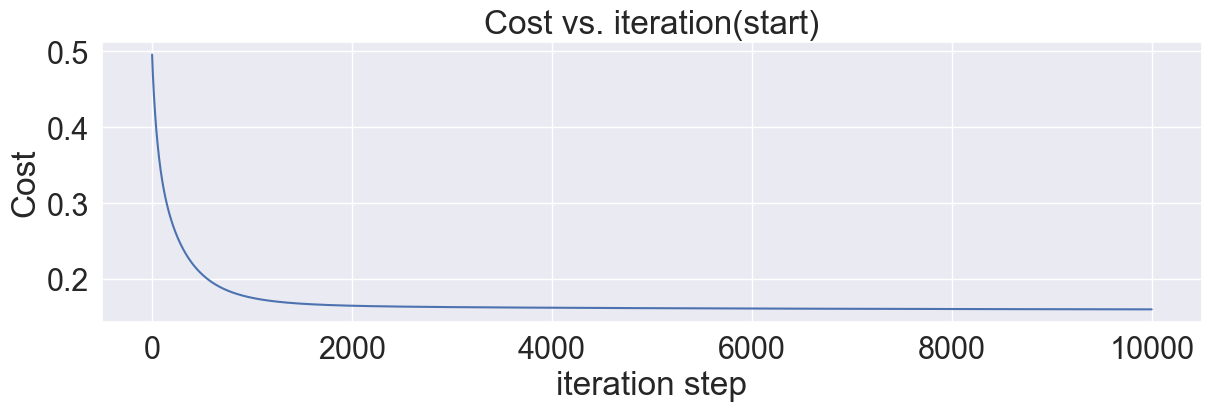

In [32]:
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history4[:10000])
ax1.set_title("Cost vs. iteration(start)");
ax1.set_ylabel('Cost')            ;
ax1.set_xlabel('iteration step')  ;
plt.show()

In [33]:
print("Mean Squared Error(MSE) for train dataset:", cost_function_with_regularization(X_train, y_train, w_final4, b_final4, lamb_da))
print("Mean Squared Error(MSE) for test dataset:", cost_function_with_regularization(X_test, y_test, w_final4, b_final4, lamb_da))

Mean Squared Error(MSE) for train dataset: 0.16039934518835863
Mean Squared Error(MSE) for test dataset: 0.08612643052174306


In [34]:
#Considering RH as target
y_train = Train_ds[:, 11] 
y_test = Test_ds[:, 11]

print("Mean Squared Error(MSE) for train dataset (RH as target):", cost_function_with_regularization(X_train, y_train, w_final4, b_final4, lamb_da))
print("Mean Squared Error(MSE) for test dataset (RH as target):", cost_function_with_regularization(X_test, y_test, w_final4, b_final4, lamb_da))

Mean Squared Error(MSE) for train dataset (RH as target): 0.6740314810456444
Mean Squared Error(MSE) for test dataset (RH as target): 1.126791608041346


In [35]:
#Considering T as target
y_train = Train_ds[:, 10] 
y_test = Test_ds[:, 10]

print("Mean Squared Error(MSE) for train dataset (T as target):", cost_function_with_regularization(X_train, y_train, w_final4, b_final4, lamb_da))
print("Mean Squared Error(MSE) for test dataset (T as target):", cost_function_with_regularization(X_test, y_test, w_final4, b_final4, lamb_da))

Mean Squared Error(MSE) for train dataset (T as target): 0.49260193851432216
Mean Squared Error(MSE) for test dataset (T as target): 0.311659332270116
